# Fraud Detection - Credit Card

### About Dataset
The dataset has a time column which shows the transaction in seconds. The dataset have more columns from V1 to V28 which represents some feature about the transaction but as the transactions of credit cards are sensitive, the columns are presented by numbers. Moreover the data has 'Amount' column which is shows the transaction amount in dollars and 'Class' column shows whether the transaction is fraud or not.

Kaggle link for the Dataset - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_card = pd.read_csv('creditcard.csv')

In [3]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

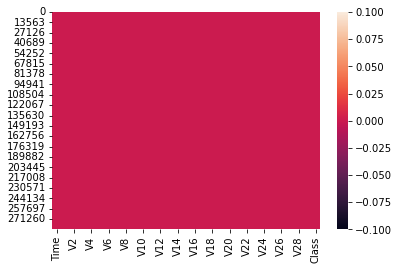

In [6]:
sns.heatmap(credit_card.isnull())
plt.show()

In [7]:
cc = credit_card.copy()

In [8]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [11]:
normal = cc[cc.Class == 0]
fraud = cc[cc.Class == 1]

In [12]:
normal.shape , fraud.shape

((284315, 31), (492, 31))

In [13]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
#As the data is not distributed evenly, we must try to disribute evenly
normal_sample = normal.sample(n = 492)

In [16]:
cc_final = pd.concat([normal_sample, fraud], axis = 0)

In [17]:
cc_final.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
238127,149534.0,1.984559,-1.930051,-1.088922,-1.675583,-1.137633,0.197087,-1.172027,-0.013930,-1.363433,...,-0.033546,0.040126,0.075293,0.194804,-0.263096,-0.214940,-0.008614,-0.024935,170.00,0
86001,61038.0,-1.120009,0.750977,2.561013,-0.030162,-0.294961,0.376599,0.342202,-0.241689,1.114473,...,-0.060526,0.195483,-0.196190,0.093669,-0.280904,0.222552,-0.678189,-0.238742,11.50,0
18773,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1
135718,81372.0,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
53794,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1


In [18]:
#Checking if the data is evenly distributed or not
dis = cc_final['Class'].value_counts()
dis

0    492
1    492
Name: Class, dtype: int64

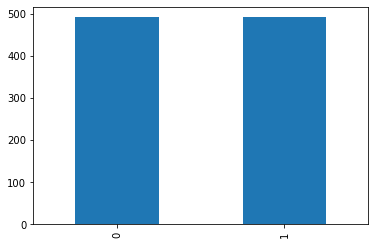

In [19]:
dis.plot(kind = 'bar')
plt.show()

In [20]:
cc_final.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94732.664634,-0.085919,-0.019114,-0.053619,0.006691,-0.050785,-0.012492,0.024236,0.061619,-0.008557,...,0.037702,0.010396,0.030114,0.024403,0.040706,0.015014,0.053984,0.002213,0.000449,105.385203
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
x = cc_final.drop(['Class'], axis = 1)
y = cc_final['Class']

In [23]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
270265,163994.0,-5.808461,5.392370,-5.774109,-0.357545,-2.558459,-1.157350,-3.267030,4.632311,-1.090659,...,-0.866347,0.822767,0.753494,0.389022,-0.034907,0.064843,-0.214839,-1.955874,-0.274923,0.78
33592,37297.0,0.566593,-1.377684,0.438796,0.458684,-1.453851,-0.477246,-0.165218,0.091295,0.686577,...,0.439434,0.162691,-0.282379,-0.239335,0.578153,0.009977,0.956825,-0.137795,0.051701,330.00
107181,70320.0,-1.672614,-4.918784,-1.770582,1.282633,-1.757134,-0.065947,2.060316,-0.471106,-0.064054,...,2.991896,0.859665,-0.919356,-1.476437,0.166703,-0.024381,0.932249,-0.391549,0.243992,1532.00
146920,87962.0,-2.956152,2.569305,-1.167447,-2.839101,-0.504506,-1.310978,0.040740,1.292558,0.570710,...,0.329463,-0.305360,-0.906408,0.057786,-0.371626,0.278880,0.407416,0.470357,0.327971,1.00
154360,101272.0,1.263040,-1.097398,-0.603314,1.863709,-0.381287,0.407999,0.049589,-0.056598,2.062494,...,0.410453,-0.426954,-1.428825,0.099281,-0.501971,-0.438762,-1.176204,-0.030902,0.009327,342.11


In [24]:
y.head()

270265    0
33592     0
107181    0
146920    0
154360    0
Name: Class, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=0)

In [26]:
lg = LogisticRegression()

In [27]:
lg.fit(X_train, y_train)

LogisticRegression()

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((688, 30), (296, 30), (688,), (296,))

In [29]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [30]:
y_train.shape, y_test.shape

((688, 1), (296, 1))

In [31]:
lg.score(X_test, y_test)

0.9222972972972973

In [32]:
y_train_pred = lg.predict(X_train)
y_train_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [33]:
y_test_pred = lg.predict(X_test)
y_test_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [35]:
print("R2Score : " ,r2_score(y_test, y_test_pred)) 
print("mean_absolute_error : ",mean_absolute_error(y_test, y_test_pred))
print("mean_squared_error : " ,mean_squared_error(y_test, y_test_pred)) 
print("Root mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2Score :  0.6891749988586038
mean_absolute_error :  0.0777027027027027
mean_squared_error :  0.0777027027027027
Root mean_squared_error :  0.27875204519913876


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) 

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train_std,y_train)
rf_tree_y_pred = rf_tree.predict(X_train_std)
print("Accuracy: {}".format(rf_tree.score(X_train_std,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9734927992563485
R squared: 0.9734927992563485


In [38]:
print ('Logistic Regression Accuracy: {}'.format(lg.score(X_test, y_test)))
print ('Random Forest Accuracy: {}'.format(rf_tree.score(X_train_std,y_train)))

Logistic Regression Accuracy: 0.9222972972972973
Random Forest Accuracy: 0.9734927992563485


#### **Conclusion**
Random Forest Regressor has more accuracy than Logistic Regression. So we can use Random Forest Regressor to detect the fraud in credit transaction.